# ISYS2407 Information Systems Solutions & Design

# Exploratory Data Analysis

###### © France and Christopher Cheong 2020

## 1 Import libraries

In [61]:
# Pandas is the main library used for exploratory data analysis
# Pandas is built on top of numpy 
# Numpy allows fast advanced mathematical operations on large amount of data
import numpy as np
import pandas as pd

# Library to assign missing values - not used here, better do it in EDA
from sklearn.impute import SimpleImputer

# Matplotlib is the main plotting library for python
# Seaborn is built on top of matplotlib and it's easier to use
# pandas also have same basic plotting capabilities which are again built on top of matplotlib
import matplotlib.pyplot as plt
# The next statement instructs matplotlib to plot the graphs inside the notebook
%matplotlib inline 
import seaborn as sns

# Another useful plotting library is plotly - it is used for interactive plots

## 2 Load data

In [62]:
# Load the data - assuming its stored on your computer
#diabetes_df = pd.read_csv("diabetes.csv") # the suffix _df stands for dataframe
#diabetes_df = pd.read_csv("data/diabetes.csv") # if the CSV file is in folder data

# If you suspect missing values are coded in non-standard ways
#missing_values = ['?', '--', ' ', 'NA', 'N/A', '-'] # you can add more in the list
#diabetes_df = pd.read_csv("diabetes.csv", na_values=missing_values)

# If delimiter is not a comma
#diabetes_df = pd.read_csv("diabetes.csv", delimiter=';')

In [63]:
# Load the data from the web
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
col_names = ['num_pregnancies', 
             'glucose', 
             'blood_pressure', 
             'skin_thickness', 
             'insulin', 
             'bmi', 
             'pedigree', 
             'age', 
             'outcome']
diabetes_df = pd.read_csv(url, header=None, names=col_names)

In [64]:
# What is the data type?
#type(diabetes_df)
# or
print(type(diabetes_df))

<class 'pandas.core.frame.DataFrame'>


In [65]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   num_pregnancies  768 non-null    int64  
 1   glucose          768 non-null    int64  
 2   blood_pressure   768 non-null    int64  
 3   skin_thickness   768 non-null    int64  
 4   insulin          768 non-null    int64  
 5   bmi              768 non-null    float64
 6   pedigree         768 non-null    float64
 7   age              768 non-null    int64  
 8   outcome          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
# shape will return as tuple containing the number of rows and columns
#diabetes_df.shape
#diabetes_df.shape[0]
#diabetes_df.shape[1]

# Note: the result of a line of code is automatically printed below the cell
# However, if there are more than one statements, then one of them will print its results
# And only the result of the last statement is visible
# But if you can override this behaviour by using print statements as shown below
print(diabetes_df.shape)
print(diabetes_df.shape[0])
print(diabetes_df.shape[1])

(768, 9)
768
9


In [67]:
# By default, head() will display 5 rows
diabetes_df.head()
# If you want to see more rows, pass the number as a parameter to the function
#diabetes_df.head(10)

# Note: You can also use Excel to view the CSV file

,num_pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 3 Summary statistics

In [68]:
# Print the number of rows and columns (as done before)
# We are here using the python3 f-string which is a lot easier to use
# The format is f""
# Inside the single or double quotation marks, you can have any combination of strings and variables
# Variables are enclosed within curly brackets {}
# The f-string dosumentation can be found at https://www.python.org/dev/peps/pep-0498/
print(f"Rows     : {diabetes_df.shape[0]}")
print(f"Columns  : {diabetes_df.shape[1]}" ,)
print()

# Print the column names
print(f"Features : {diabetes_df.columns.tolist()}")
print()

# Print the total number of null values in the data
# Null values are - NaN (not a number), or blank spaces
# 0 is not a null value - it's a valid value
print(f"Missing values :  {diabetes_df.isnull().sum().values.sum()}")

# For each column, print the number of unique values
# 2 unique values in column - binary categorical variable e.g. male/female, yes/no, etc
# less than 6 values in columns - still a categorical value but with more than 2 classes
# large number of values - continuous variable
print(f"Unique values :  {diabetes_df.nunique()}")

Rows     : 768
Columns  : 9

Features : ['num_pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'pedigree', 'age', 'outcome']

Missing values :  0
Unique values :  num_pregnancies     17
glucose            136
blood_pressure      47
skin_thickness      51
insulin            186
bmi                248
pedigree           517
age                 52
outcome              2
dtype: int64


# 4 Descriptive statistics for continuous values

In [69]:
#diabetes_df.describe()
diabetes_df.describe().T # T means transpose rows to columns

,count,mean,std,min,25%,50%,75%,max
num_pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
blood_pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# 5 Visualisations

# Univariate, bivariate and multivariate data

#### 1 Univariate data: data about one variable

Univariate data is the simplest form of data since it deals with only one quantity that changes. Analysis and visualisation of this data involves describing the data and finding patterns within the data.


#### 2 Bivariate data: data about two variables
This type of data involves two different variables. Analysis and visualisation of this type of data involves finding relationships betweenthe two variables


#### 3 Multivariate data: data about more than two variables

Multivariate data consists of  three or more variables. Analysis and visualisation of multivariate data is similar to bivariate  except that there is more than one dependent variable.

# 6 Correlations between pairs of variables

In [70]:
# 1. Use the corr() function from the dataframe to compute the correlations and display as text
corr = diabetes_df.corr()
print(type(corr))
print(corr)

<class 'pandas.core.frame.DataFrame'>
                 num_pregnancies   glucose  blood_pressure  skin_thickness  \
num_pregnancies         1.000000  0.129459        0.141282       -0.081672   
glucose                 0.129459  1.000000        0.152590        0.057328   
blood_pressure          0.141282  0.152590        1.000000        0.207371   
skin_thickness         -0.081672  0.057328        0.207371        1.000000   
insulin                -0.073535  0.331357        0.088933        0.436783   
bmi                     0.017683  0.221071        0.281805        0.392573   
pedigree               -0.033523  0.137337        0.041265        0.183928   
age                     0.544341  0.263514        0.239528       -0.113970   
outcome                 0.221898  0.466581        0.065068        0.074752   

                  insulin       bmi  pedigree       age   outcome  
num_pregnancies -0.073535  0.017683 -0.033523  0.544341  0.221898  
glucose          0.331357  0.221071  0.137337

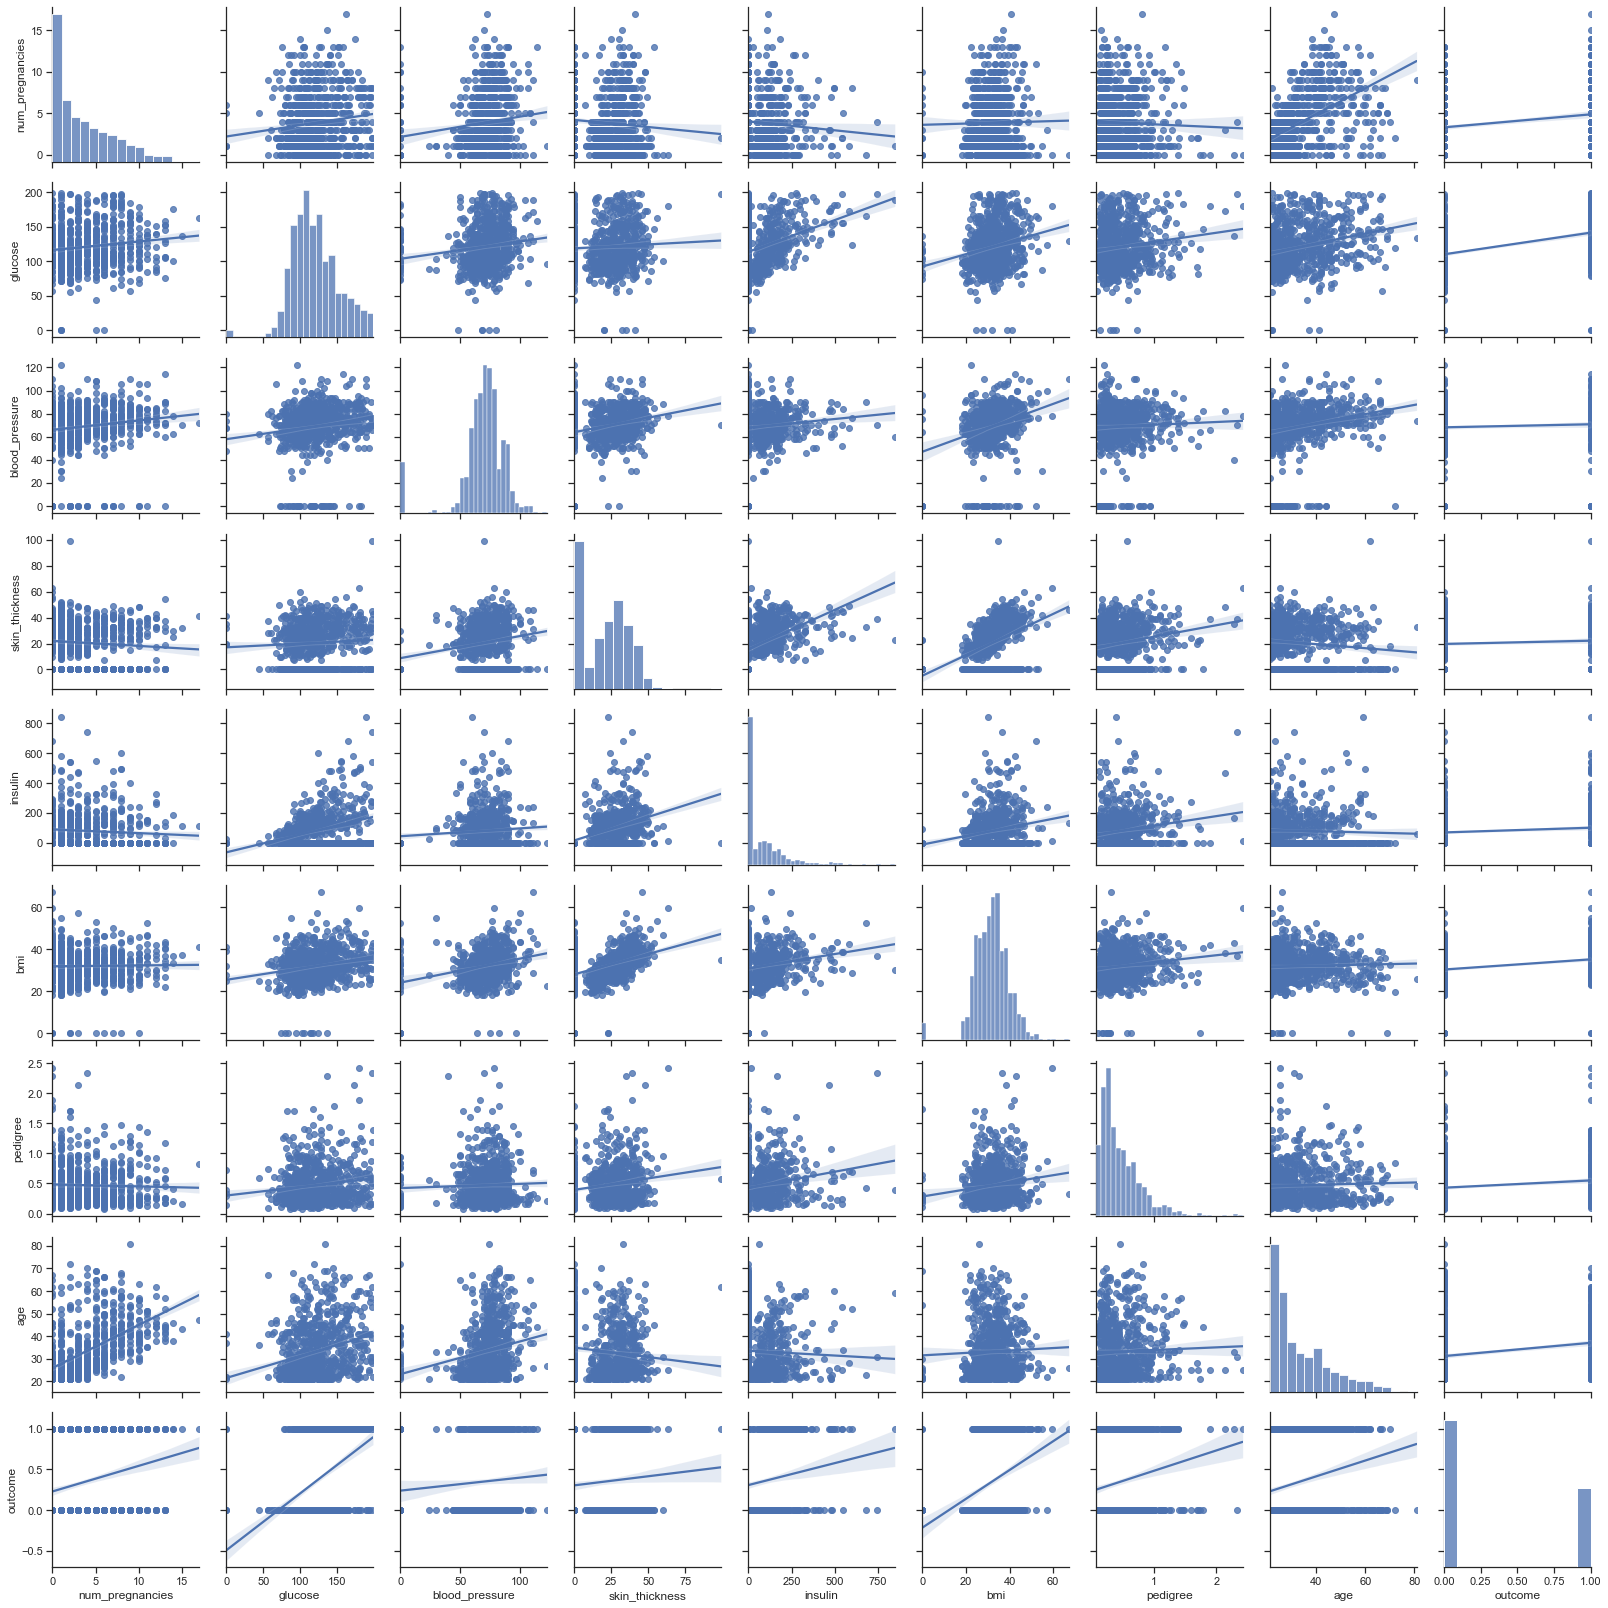

In [71]:
# SLOW! Takes a few minutes to plot and might get warnings if probelsm with the data

# 2. Using seaborn's pairplot() to plot the correlations as scatter plots and regression lines
# The seaborn pairplot documentation can be found 
# at https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.set(style='ticks')
#plt.figure(figsize=(8,16)) #figsize(width, height) in inches - default(6.4, 4.8) - customise as required
sns.pairplot(diabetes_df, kind="reg") # kind="reg" means plot the regression line as well

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('correlation-pairplot.png', dpi=300) # dpi=300 is print quality

# The histograms shown on the diagonals are the frequency distributions of the values in each column
# The order is: 'num_pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 
# 'insulin', 'bmi', 'pedigree', 'age', 'outcome'

# And the other cells show the correlations between pairs of variables
# Example in the first row, the y axis is Pregnancies
# The variables on the x-axis can be seen at the bottom of the graph
# e.g. col2=glucose, col3=blood_pressure, etc
# The strength of the correlation depends on the slope of the regression line

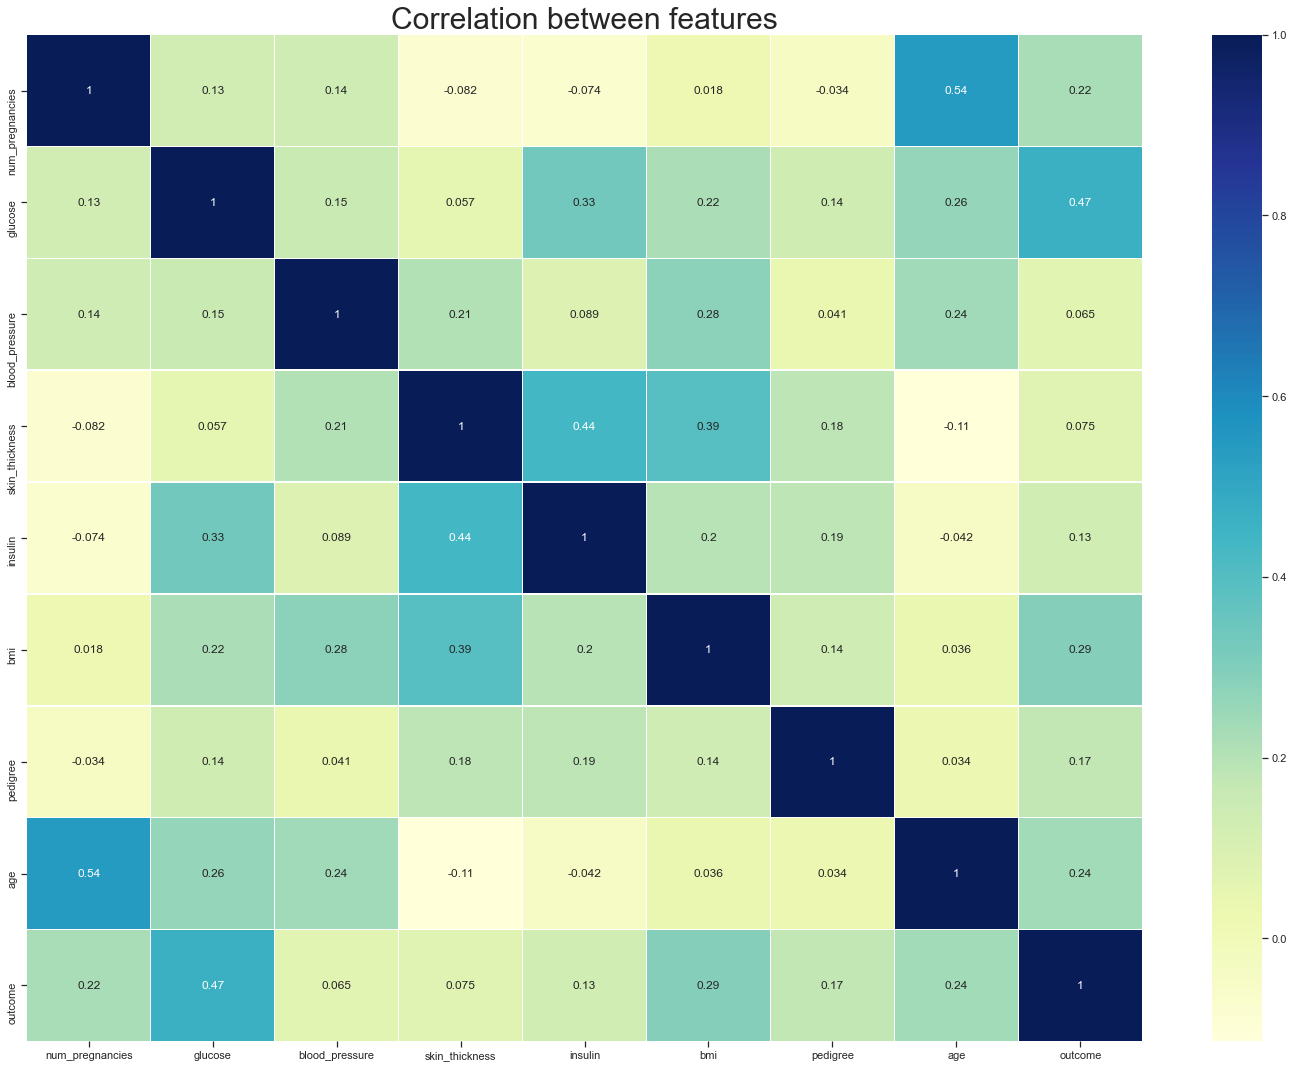

In [72]:
# 3. Using seaborn to plot the correlations as a heatmap
# Ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.rcParams['figure.figsize'] = (20, 15) #figsize(width, height) in inches - default(6.4, 4.8) - customise as required
sns.heatmap(diabetes_df.corr(), annot = True, linewidths=.5, cmap="YlGnBu") # YellowGreenBlue
plt.title('Correlation between features', fontsize = 30)
#plt.show() # Do not use this if you want to save to file

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('correlation-heatmap-rectangular.png', dpi=300) # dpi=300 is print quality

# The colours show the strength of the correlations - from yellow (weak) to dark blue (strong)

# Cells on the diagonal are dark blue (corr=1) - correlation of the variable with itself

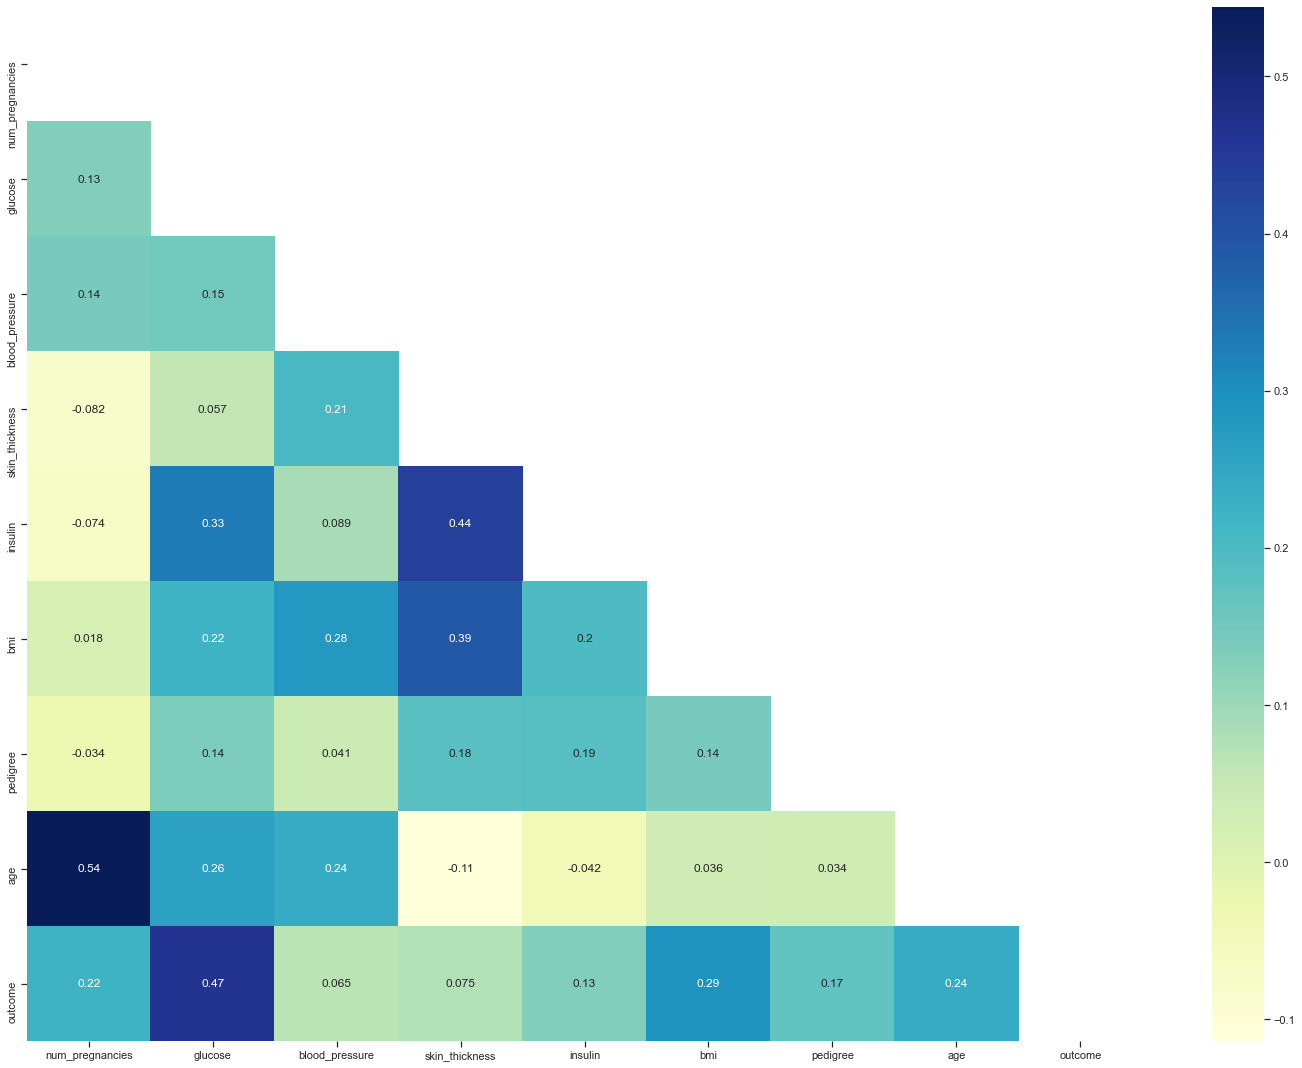

In [73]:
# Changing the shape of the matrix from rectangular to triangular
# https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
matrix = np.triu(diabetes_df.corr())
sns.heatmap(diabetes_df.corr(), annot=True, mask=matrix,  cmap="YlGnBu")

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('correlation-heatmap-traingular.png', dpi=300) # dpi=300 is print quality

# 7 Visualisations of continuous variables

## 7.1 What is the proportion of diabetics in the sample?

labels: ['Healthy', 'Diabetic']
values: [500, 268]


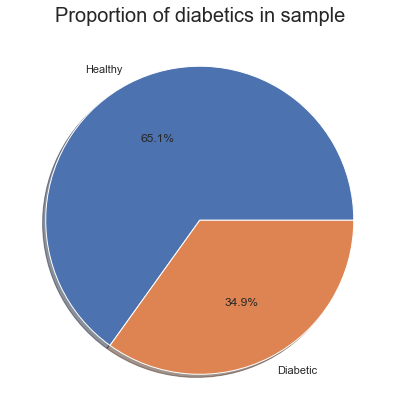

In [74]:
# Plot a pie chart
# Get the labels from the "outcome" column - use keys() function to get the labels
#labels = diabetes_df["outcome"].value_counts().keys().tolist() # [0,1] not meaningful
labels = ["Healthy", "Diabetic"]
print(f"labels: {labels}")

# Get the values from the "outcome" column - use values to get the values
values = diabetes_df["outcome"].value_counts().values.tolist()
print(f"values: {values}")

# Use matplotlib to draw a simple pie chart
# Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html
plt.figure(figsize=(6,6)) #figsize(width, height) in inches - default(6.4, 4.8) - customise as required
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("Proportion of diabetics in sample", fontsize=20) # use fontsize=20 if title is too small

# If the fonts are too small with the default settings, you can adjust them as required
#plt.rc('font', size=10)        # adjust default text sizes (if required)
#plt.rc('axes', labelsize=10)  # adjust fontsize of labels on x/y axes (if required)
#plt.rc('axes', titlesize=10)  # adjust fontsize of titles on x/y axes (if required)
#plt.rc('xtick', labelsize=10) # adjust fontsize of tick labels on x axis (if required)
#plt.rc('ytick', labelsize=10) # adjust fontsize of tick labels on y axis (if required)
#plt.rc('legend', fontsize=10) # adjust fontsize of legend (if required)
#plt.rc('figure', titlesize=30) # adjust fontsize of legend (if required)

#plt.show() # Do not use this is you want to save to file - the file will be empty

# Save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('proportion-diabetics.png', dpi=300)

## 7.2 Split the data into 2 groups - diabetics and non-diabetics to perform further analyses (this might or might not be useful)

In [75]:
# Non-diabetics
non_diabetics_df = diabetes_df[diabetes_df["outcome"]==0]
non_diabetics_df.head()

,num_pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [76]:
# Diabetics
diabetics_df = diabetes_df[diabetes_df["outcome"]==1]
diabetics_df.head()

,num_pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


## 7.3 Impact of glucose on diabetes

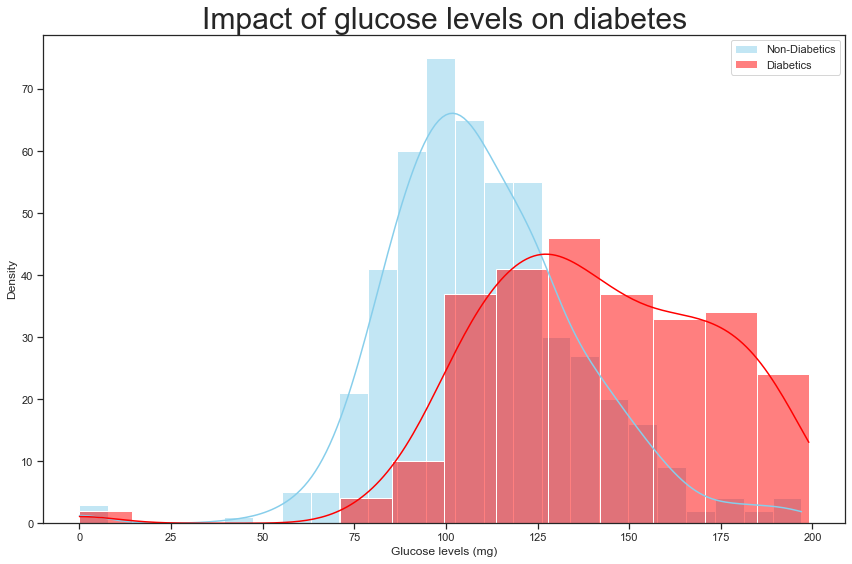

In [77]:
# Plot frequency distributions of non-diabetics and diabetics
# Ref:https://seaborn.pydata.org/generated/seaborn.distplot.html

plt.figure(figsize=(12,8)) # figsize(width, height) in inches - default(6.4, 4.8)
#sns.distplot(non_diabetics_df['Glucose'], color="skyblue", label="Non-Diabetics", kde=False)

### distplot() is deprecated, it will still work - use histplot() ###
#sns.distplot(non_diabetics_df['glucose'], color="skyblue", label="Non-Diabetics") # no kde
#sns.distplot(diabetics_df['glucose'], color="red", label="Diabetics")

sns.histplot(data=non_diabetics_df, x="glucose", color="skyblue", label="Non-Diabetics", kde=True)
sns.histplot(data=diabetics_df, x="glucose", color="red", label="Diabetics", kde=True)

plt.legend()
plt.title('Impact of glucose levels on diabetes', fontsize = 30)
plt.xlabel("Glucose levels (mg)")
plt.ylabel("Density")

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('glucose-diabetes.png', dpi=300) # dpi=300 is print quality

## 7.4 Impact of BMI on diabetes

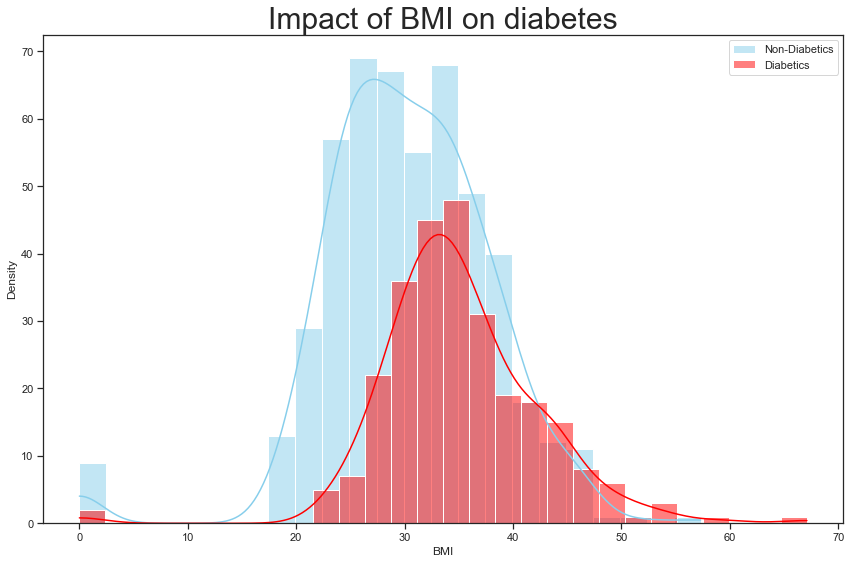

In [78]:
# Plot frequency distributions of non-diabetics and diabetics
plt.figure(figsize=(12,8)) # figsize(width, height) in inches - default(6.4, 4.8)

### distplot() is deprecated, it will still work - use histplot() ###
#sns.distplot(non_diabetics_df['bmi'], color="skyblue", label="Non-Diabetics")
#sns.distplot(diabetics_df['bmi'], color="red", label="Diabetics")

sns.histplot(data=non_diabetics_df, x="bmi", color="skyblue", label="Non-Diabetics", kde=True)
sns.histplot(data=diabetics_df, x="bmi", color="red", label="Diabetics", kde=True)

plt.title('Impact of BMI on diabetes', fontsize = 30)
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend()

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('bmi-diabetes.png', dpi=300) # dpi=300 is print quality

## 7.5 Impact of age on diabetes

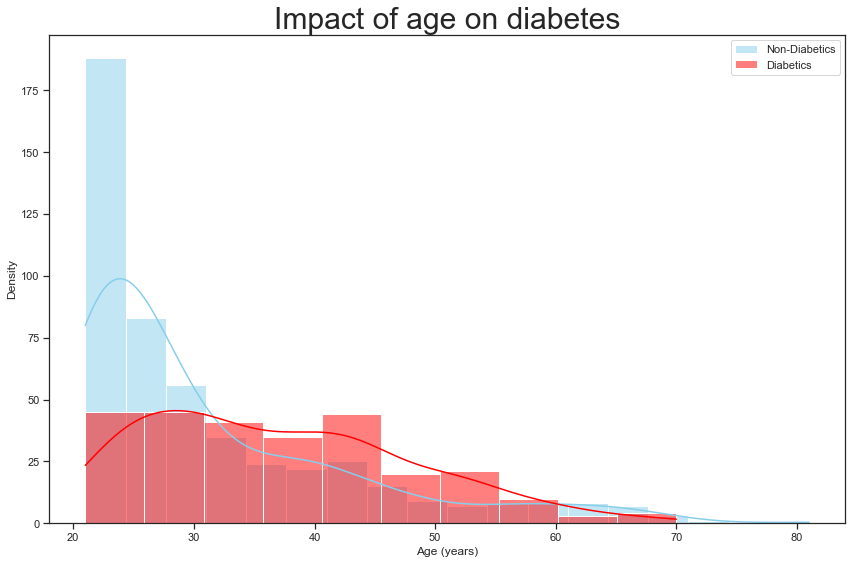

In [79]:
# Plot frequency distributions of non-diabetics and diabetics
plt.figure(figsize=(12,8)) # figsize(width, height) in inches - default(6.4, 4.8)

### distplot() is deprecated, it will still work - use histplot() ###
#sns.distplot(non_diabetics_df['age'], color="skyblue", label="Non-Diabetics")
#sns.distplot(diabetics_df['age'], color="red", label="Diabetics")

sns.histplot(data=non_diabetics_df, x="age", color="skyblue", label="Non-Diabetics", kde=True)
sns.histplot(data=diabetics_df, x="age", color="red", label="Diabetics", kde=True)

plt.title('Impact of age on diabetes', fontsize = 30)
plt.xlabel("Age (years)")
plt.ylabel("Density")
plt.legend()

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('age-diabetes.png', dpi=300) # dpi=300 is print quality

# 8 Visualisations of categorical variables

There is no categorical variable in this dataset. We'll create an arbitrary categorical variable for the purpose of illustrating the plotting of categorical charts.

## 8.1 Compute new categorical data and insert as a new column

In [80]:
# When checking the number of unique values, the blood pressure column was found to contain 47 values
# This is evidence that it's a continuous variable
# Classification algorithms do not work well with continuous values - too many values
# No need to categorise them. How? Need some domain knowlege
# less than 80 = normal, between 80-89 = high, greater than 89 = very high
# Define a function to classify this
# Pass the whole dataframe as parameter
# And return a category
def bp_category(df): 
    if df["blood_pressure"] <= 80:
        return "bp_normal"
    elif (df["blood_pressure"] > 80) & (df["blood_pressure"] <= 89):
        return "bp_high"
    elif df["blood_pressure"] > 89:
        return "bp_very_high"

# Use apply() to apply a lambda function for all the rows of the dataframe
# The lambda function calls the previously defined function bp_category()
# To which it passes the diabetes_df as parameter
# And a category is returned and saved in a new column named "blood_pressure_category"
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
# the backslash is a line continuation character - there should be nothing after it, not even a space
diabetes_df["blood_pressure_category"] = \
    diabetes_df.apply(lambda diabetes_df:bp_category(diabetes_df), axis = 1) # axis=1 = row-wise
# Check
diabetes_df.head()
# This works as there's a new column named "blood_pressure_category"
# The column "blood_pressure" is no longer needed and hence can be deleted 

# This example has shown how to add a column using apply() and a lambda function
# There are other ways to add columns to a dataframe
# You can google this 
# e.g https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html

,num_pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,pedigree,age,outcome,blood_pressure_category
0,6,148,72,35,0,33.6,0.627,50,1,bp_normal
1,1,85,66,29,0,26.6,0.351,31,0,bp_normal
2,8,183,64,0,0,23.3,0.672,32,1,bp_normal
3,1,89,66,23,94,28.1,0.167,21,0,bp_normal
4,0,137,40,35,168,43.1,2.288,33,1,bp_normal


In [81]:
# Separate the clean data into non-diabetics and diabetics
non_diabetics_df = diabetes_df[diabetes_df["outcome"]==0]
diabetics_df = diabetes_df[diabetes_df["outcome"]==1] 
# Be careful not to confuse between "diabetics_df" and "diabetes_df"!!!!!!!!

## 8.2 Plotting 2 categories as 2 separate plots side-by-side

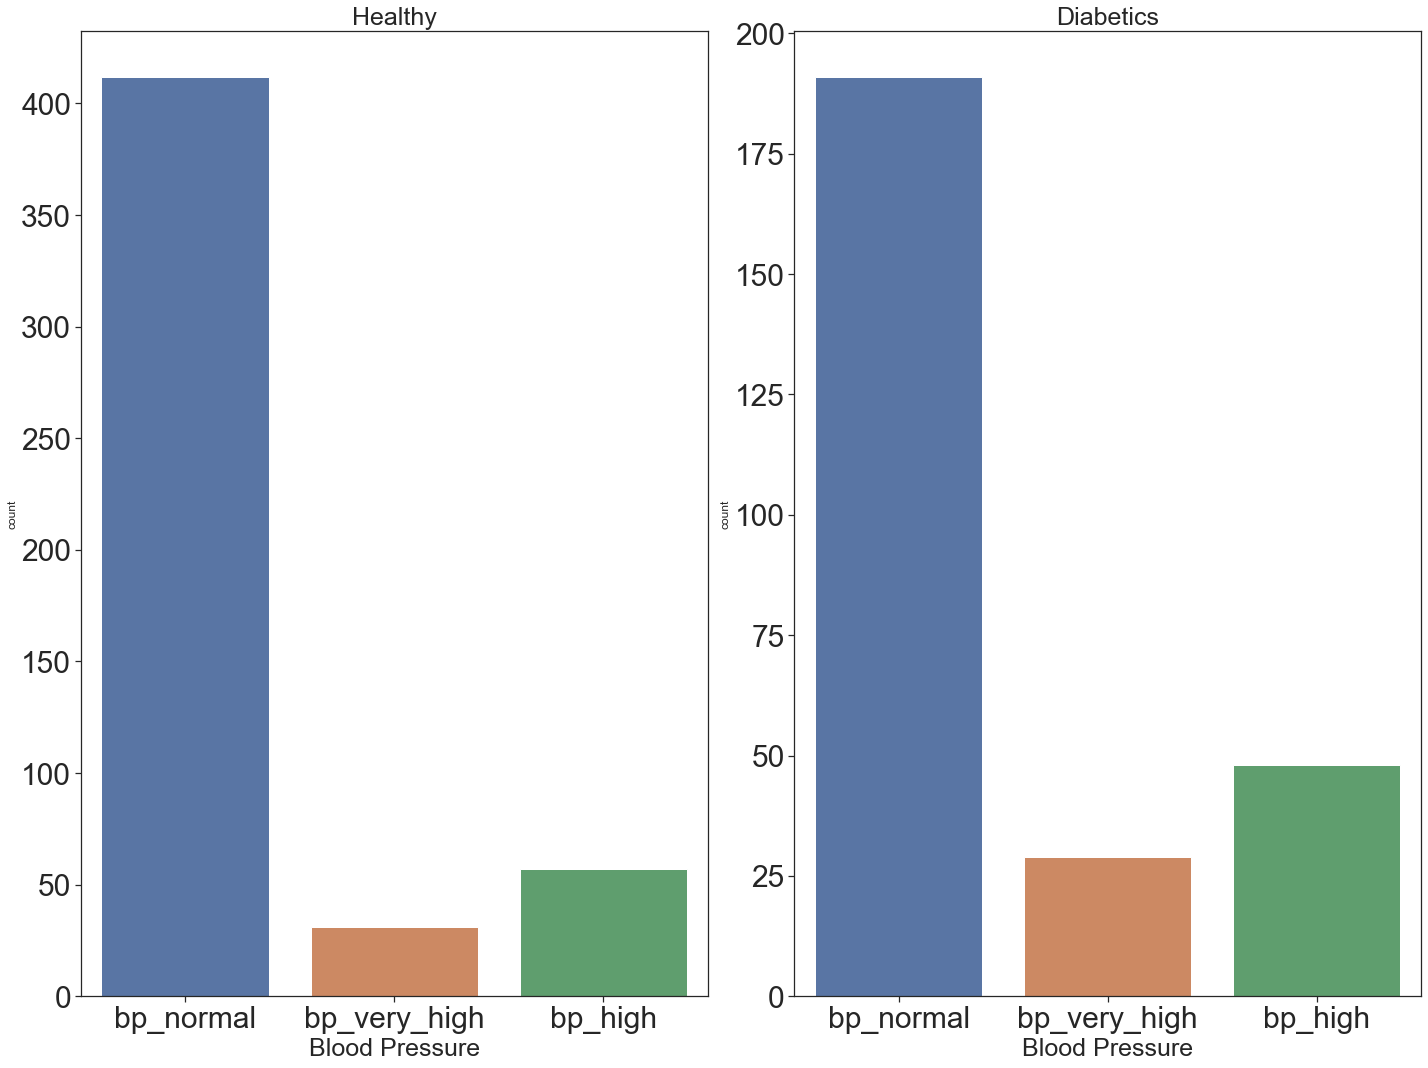

In [82]:
# Plot the charts using Seaborn's countplot()

# AS 2 separate plots side by side
fig, ax = plt.subplots(1,2)
ax1 = sns.countplot(x="blood_pressure_category", data=non_diabetics_df, ax=ax[0]) # Non-diabetics dataset
ax2 = sns.countplot(x="blood_pressure_category", data=diabetics_df, ax=ax[1]) # Diabetics dataset

# If the default labels are too small - adjust them to make them bigger
#ax1.set_title("Healthy") 
#ax1.set_xlabel("Blood Pressure")
#ax2.set_title("Diabetics")
#ax2.set_xlabel("Blood Pressure")
# Adjust the font sizes
ax1.set_title("Healthy", fontsize=25)
ax1.set_xlabel("Blood Pressure", fontsize=25)
ax2.set_title("Diabetics", fontsize=25)
ax2.set_xlabel("Blood Pressure", fontsize=25)
ax1.tick_params(axis='both', which='both', labelsize=30) # x/y axes, minor/major ticks for ax1
ax2.tick_params(axis='both', which='both', labelsize=30) # x/y axes, minor/major ticks for ax2


# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('blood_pressure_category-side-by-side.png', dpi=300) # dpi=300 is print quality

## 8.3 Plotting 2 categories as a single plot

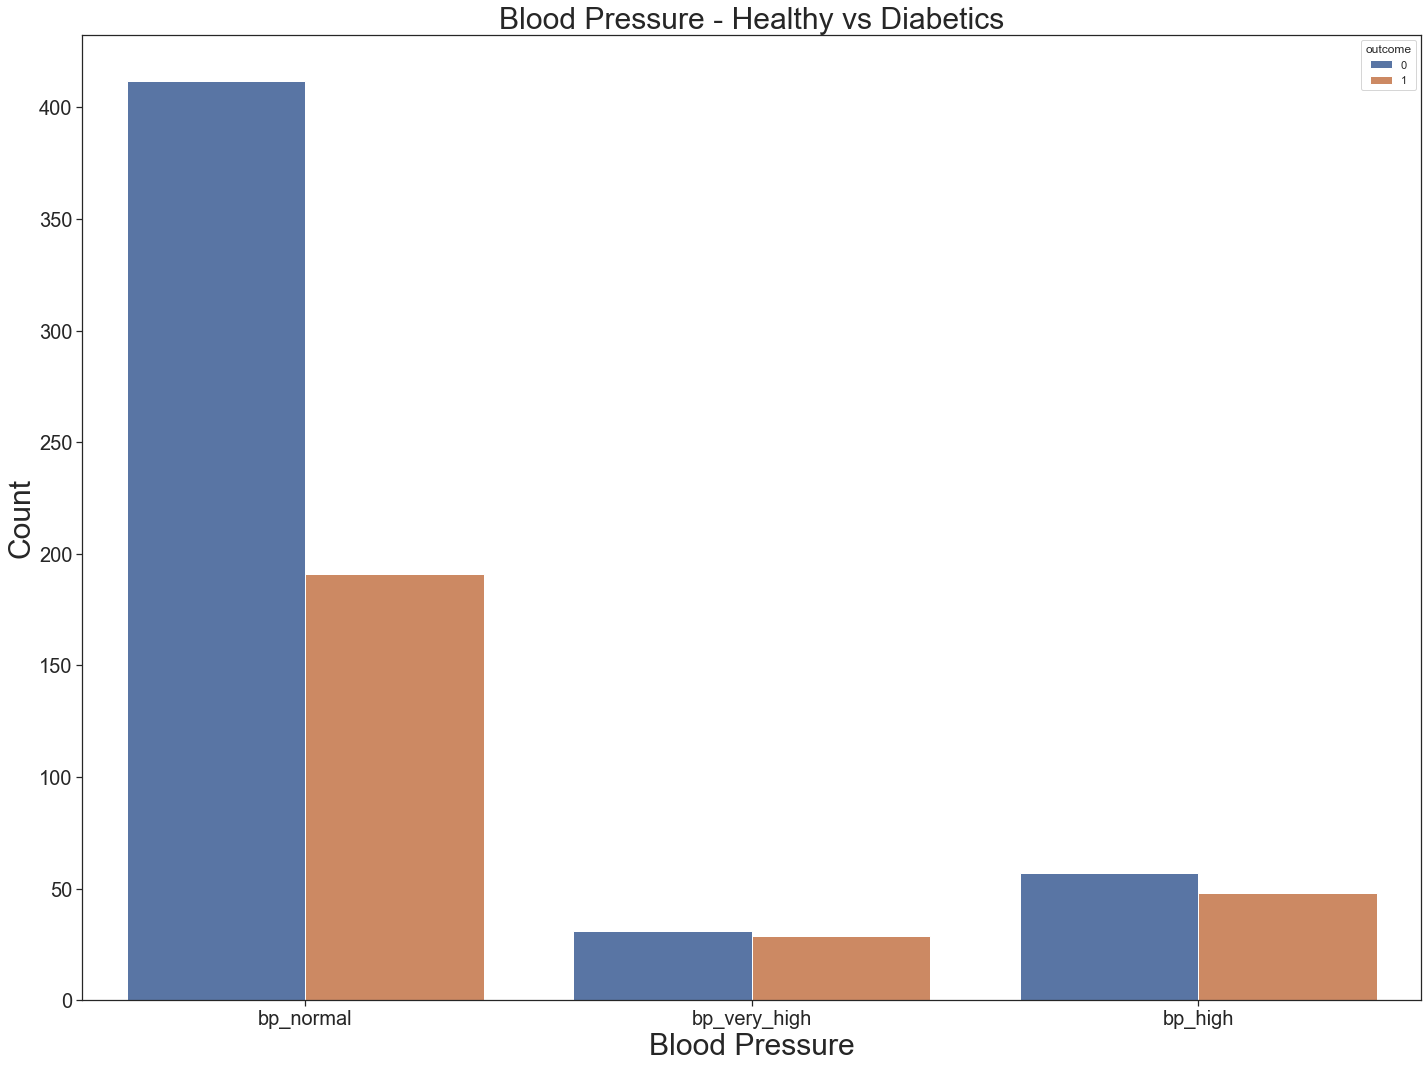

In [83]:
# Plot the charts using Seaborn's countplot()

# As a single plot with wo count charts
sns.countplot(x='blood_pressure_category', 
              data=diabetes_df, # Whole dataset (non-diabetics + diabetics)
              hue='outcome') # grouped by outcome

# If the default labels are too small - adjust them to make them bigger
#plt.title('Blood Pressure - Healthy vs Diabetics')
#plt.xlabel("Blood Pressure") # Change the xlabel - "blood_pressure_category" not user friendly
#plt.ylabel("Count")
# Adjust the font sizes
plt.title('Blood Pressure - Healthy vs Diabetics', fontsize=30)
plt.xlabel("Blood Pressure", fontsize=30)
plt.ylabel("Count", fontsize=30)
plt.tick_params(axis='both', which='both', labelsize=20) # x/y axes, minor/major ticks for plt

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('blood_pressure_category-single.png', dpi=300) # dpi=300 is print quality

# 9 Univariate data visualisation

## 9.1 An example of univariate data visualisation

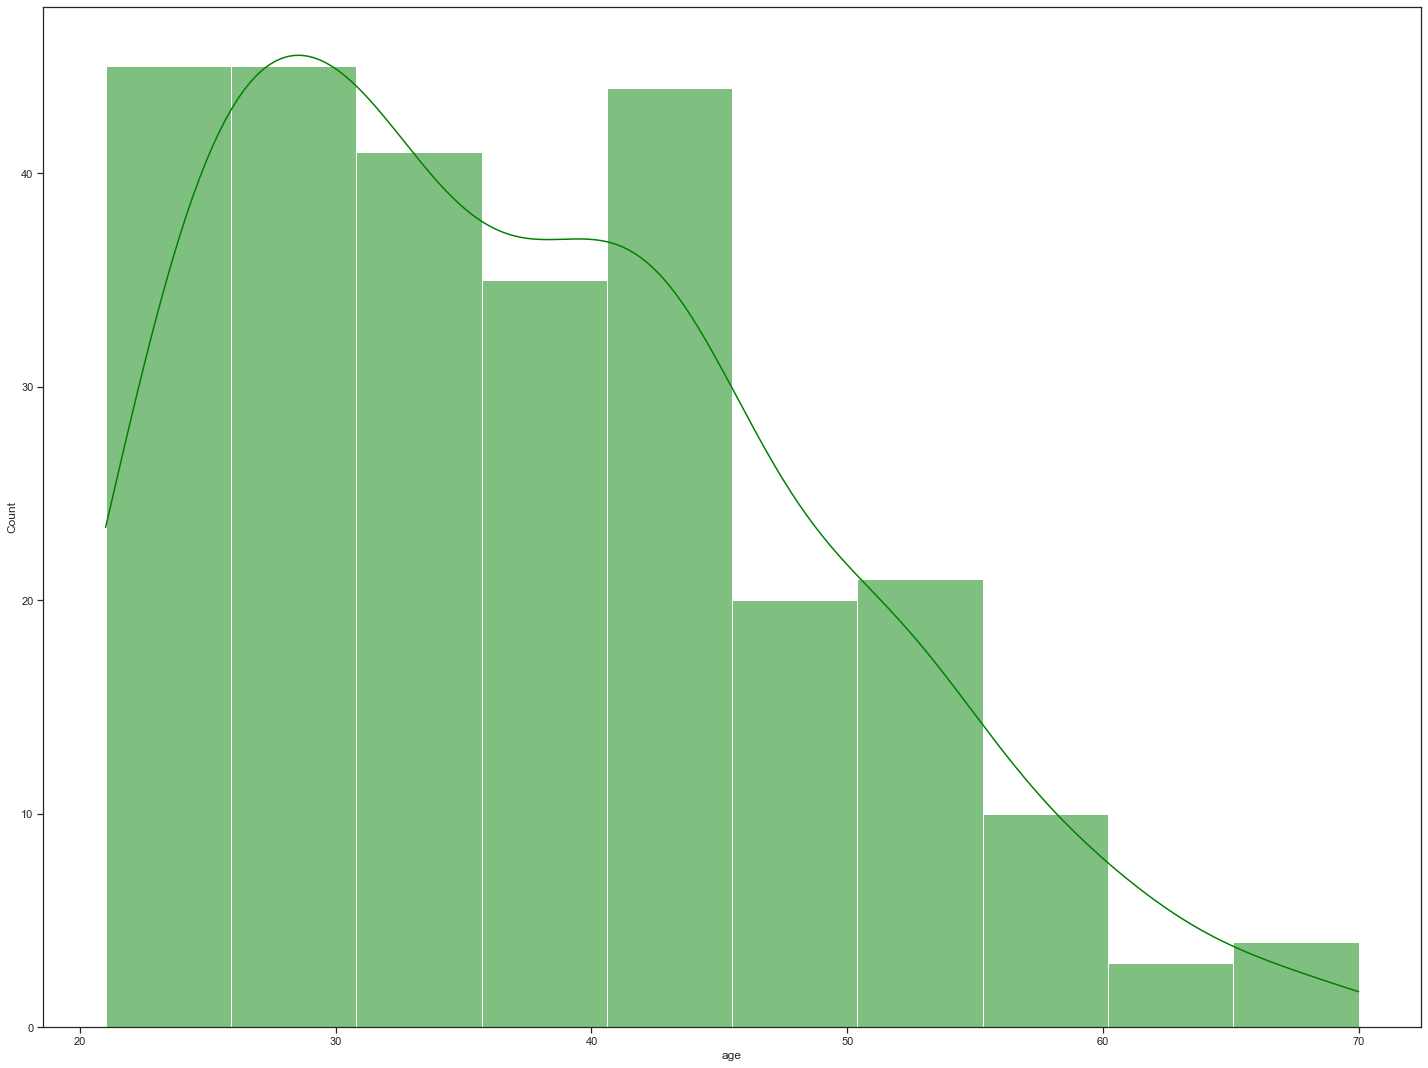

In [84]:
# This is a quick example of plotting the distribution of a continuous variable (age) as a histogram.
# We have used the distplot before
# So this a a barebones example 
# You will need to customize the plot for a more decent appearence if you want to include it in a management report

### distplot() is deprecated, it will still work - use histplot() ###
#sns.distplot(diabetics_df['age'], color="green")

sns.histplot(data=diabetics_df, x="age", color="green", kde=True)

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('age-histogram.png', dpi=300) # dpi=300 is print quality

# 10 Bivariate data visualisation

## 10.1 An example of  bivariate data visualisation

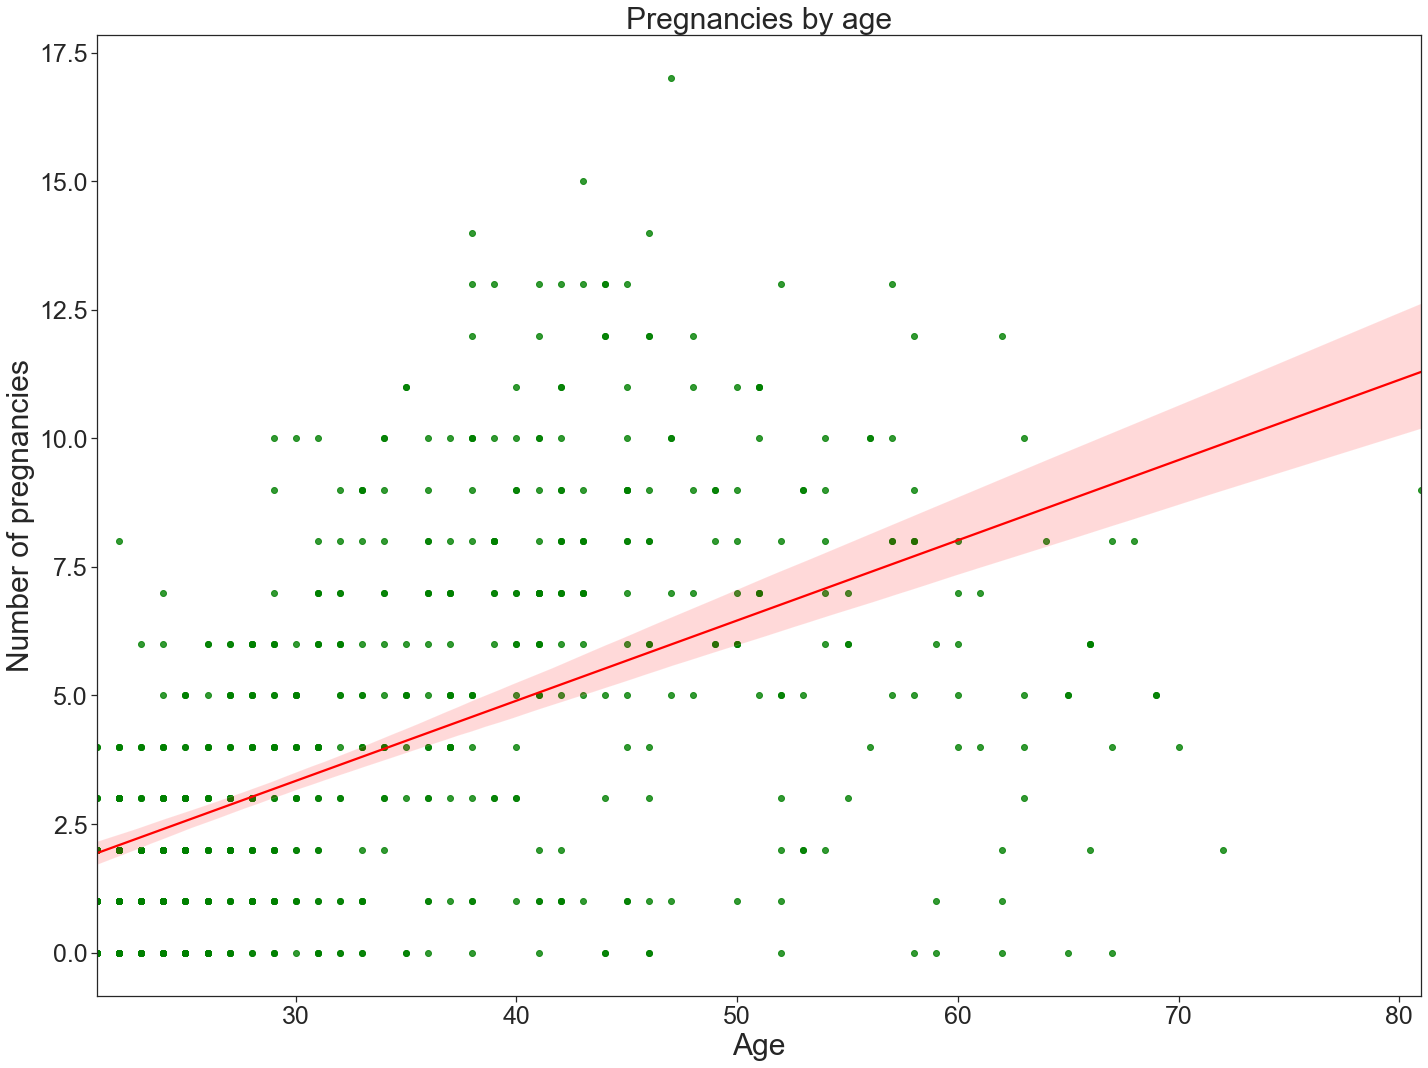

In [85]:
# Regression plot
# Ref: https://seaborn.pydata.org/generated/seaborn.regplot.html

sns.regplot(x="age", y="num_pregnancies", data=diabetes_df, 
            scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.title('Pregnancies by age', fontsize = 30)
plt.xlabel("Age", fontsize=30)
plt.ylabel("Number of pregnancies", fontsize=30)
plt.tick_params(axis='both', which='both', labelsize=25) # x/y axes, minor/major ticks for plt

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('scatterplot-age-pregnancies.png', dpi=300) # dpi=300 is print quality